In [ ]:
# Makes a 2D best fit to a white light scan

In [26]:
import glob as glob
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.sparse.linalg import lsmr
from utils2 import fake_19pl_data, basic_fcns

import cv2
import scipy

In [15]:
stem = '/Users/bandari/Documents/git.repos/photonics_spectroscopy/notebooks_for_development/data/19pl/'

# read in a test frame / dark
dark_apapane = stem + 'raw/apapanedark.fits'
test_array = fits.open(dark_apapane)[0].data
dark = test_array

x_extent = np.shape(test_array)[1]
y_extent = np.shape(test_array)[0]

# read in a broadband frame
raw_bb_frame_19pl = stem + 'dark_subted/19PL_bb_irnd1.0_optnd3.0.fits'
bb_array = fits.open(raw_bb_frame_19pl)[0].data

# dark subtract
bb_array = np.subtract(bb_array,dark)

In [20]:
# translate the broadband frame to act like it's tonight's data

height, width = bb_array.shape[:2]
T = np.float32([[1, 0, 4.3], [0, 1, 2.8]])
tonight_frame = cv2.warpAffine(bb_array, T, (width, height))

In [21]:
# assign

ref_frame = bb_array

In [30]:
# find translation

corr = scipy.signal.correlate2d(ref_frame, tonight_frame, boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match

AttributeError: module 'numpy' has no attribute '_no_nep50_warning'

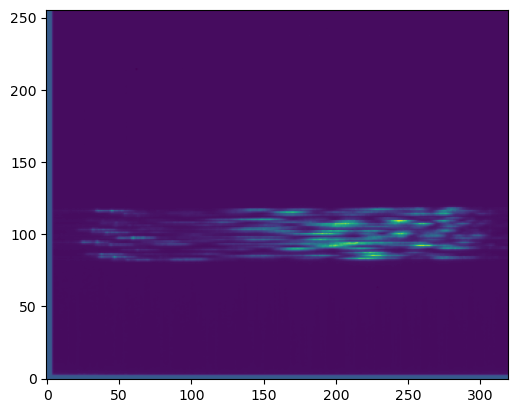

In [22]:
'''
plt.imshow(ref_frame, origin='lower')
plt.imshow(tonight_frame, origin='lower')
plt.show()
'''